## Challenge: Preparing a Dataset for Modelling


Now it's time to play with some data. You're going to work through the stages of model preparation we've covered in this lesson and write up each one. Keep a good record in a Jupyter notebook – we'll come back to your features in a future model-building assignment on Least Squares Regression.

Using a dataset of your choice, select an outcome variable and then pick four or five other variables (one to two categorical, three to four continuous) to act as the basis for features. Explore the variables using the univariate and bivariate methods you've learned so far.

Next, based on what you learned via your data exploration, create ten new features. Explain the reasoning behind each one.

Finally, use filtering methods to select the five best features and justify your choices.

When you're done, submit a link to your work below.

### Variables to be Explored
Outcome of interest: SalePrice

Categorical: Street, Neighborhood

Continuous: Overall Quality, YearBuilt, GrLivArea, WoodDeckSF

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import seaborn as sns

homePrices = pd.read_csv("/Users/jacquelynzuker/Desktop/DataScienceBootcamp/Capstone/train.csv")
df = pd.DataFrame(homePrices)

%matplotlib inline


### Explore the variables using the univariate and bivariate methods you've learned so far.

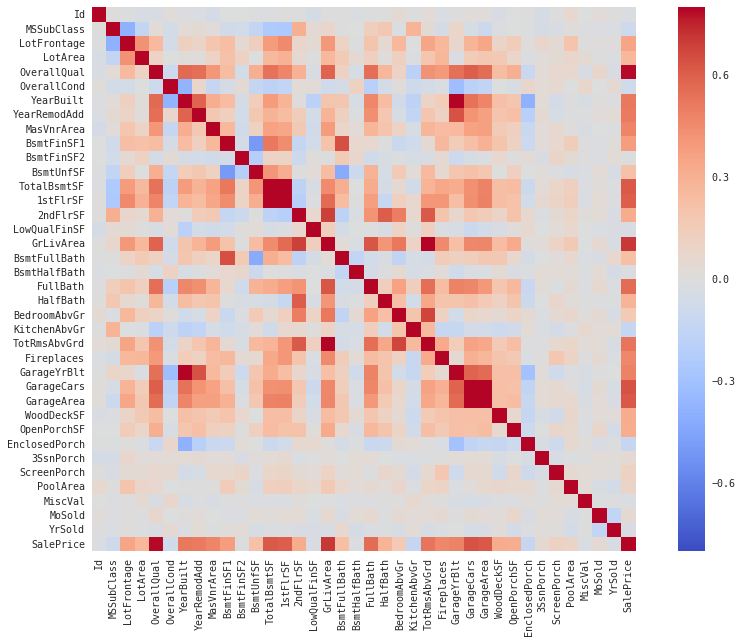

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(context="notebook", font="monospace")

vars_of_interest = homePrices.columns
vars_of_interest

# Correlation matrix of numerical features
corrmat=homePrices[vars_of_interest].corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True, cmap='coolwarm')
plt.show()

### Univariate and Bivariate Data Exploration
Now let's explore some of the variables that have been selected using the univariate and bivariate methods we've learned so far. A subsetted dataFrame has been created to make this portion run faster. 

In [3]:
subsetHomePrice = homePrices[["SalePrice", "Street", "Neighborhood", "OverallQual", "YearBuilt", "GrLivArea",
                            "WoodDeckSF"]]
subsetHomePrice = pd.get_dummies(subsetHomePrice)


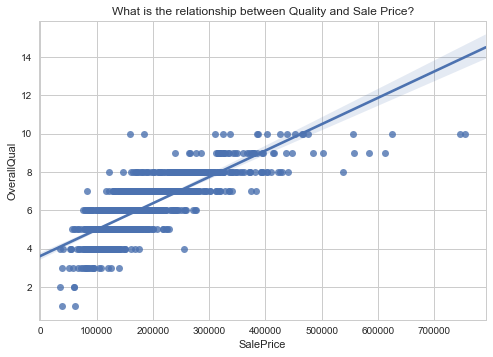

In [4]:
sns.set_style("whitegrid")
sns.regplot(x = "SalePrice", y = "OverallQual", data = subsetHomePrice)
plt.title("What is the relationship between Quality and Sale Price?")
plt.show()


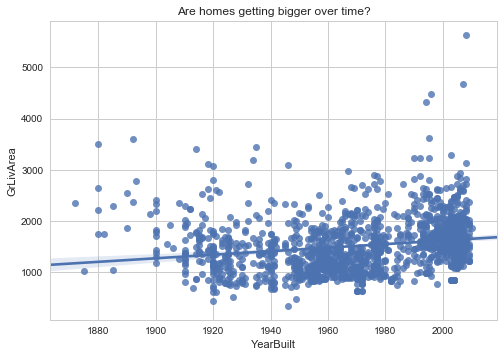

In [5]:
sns.set_style("whitegrid")
sns.regplot(x = subsetHomePrice["YearBuilt"], y = subsetHomePrice["GrLivArea"], data = subsetHomePrice)
plt.title("Are homes getting bigger over time?")
plt.show()


### Wood Deck SF

This feature could be improved. Many homes don't have a wooden deck but they have a deck built from some other type of material, and they show up as 0 on this graph. 

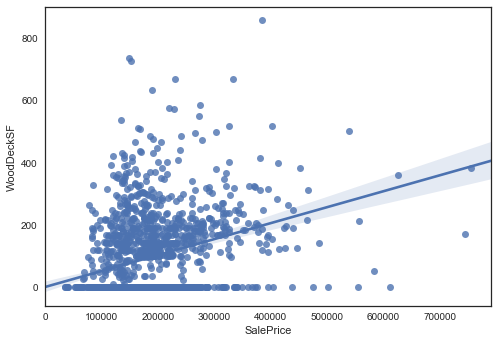

In [6]:
sns.set_style("white")
sns.regplot(x = subsetHomePrice["SalePrice"], y = subsetHomePrice["WoodDeckSF"], data = subsetHomePrice)


### Neighborhoods
It seems that the Old Town Neighborhood in the datset has a median value below the average, and the North Ridge neighborhood has a median value above the average. 

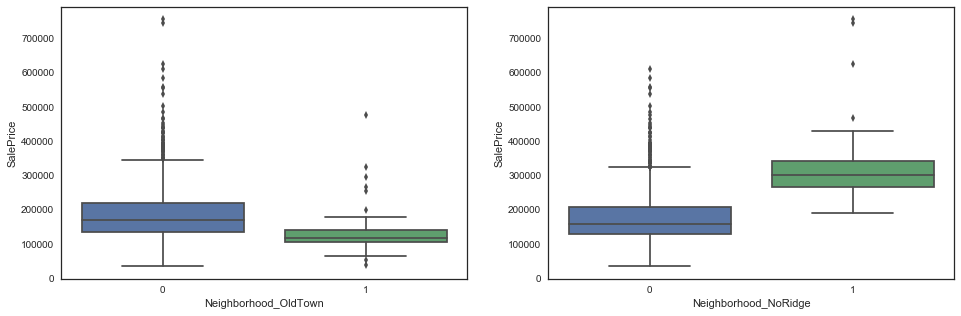

In [7]:
fig, axs = plt.subplots(ncols=2, figsize=(16,5))
sns.boxplot("Neighborhood_OldTown","SalePrice", data=subsetHomePrice, ax = axs[0])
sns.boxplot("Neighborhood_NoRidge","SalePrice", data=subsetHomePrice, ax = axs[1])
plt.show()

### Quality
Below is the distribution of Quality scores assigned to homes in the dataset. 

(array([   2.,    3.,   20.,  116.,  397.,  374.,  319.,  168.,   43.,   18.]),
 array([  1. ,   1.9,   2.8,   3.7,   4.6,   5.5,   6.4,   7.3,   8.2,
          9.1,  10. ]),
 <a list of 10 Patch objects>)

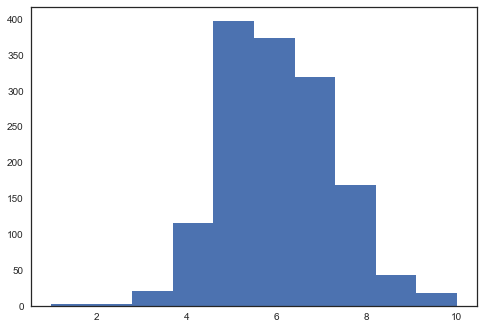

In [8]:
plt.hist(subsetHomePrice["OverallQual"])

The street_gravel subtype has a lower median value than other street subtypes. The distribution of sale prices in the dataset is skewed to the right, with a few high outliers to the right. 

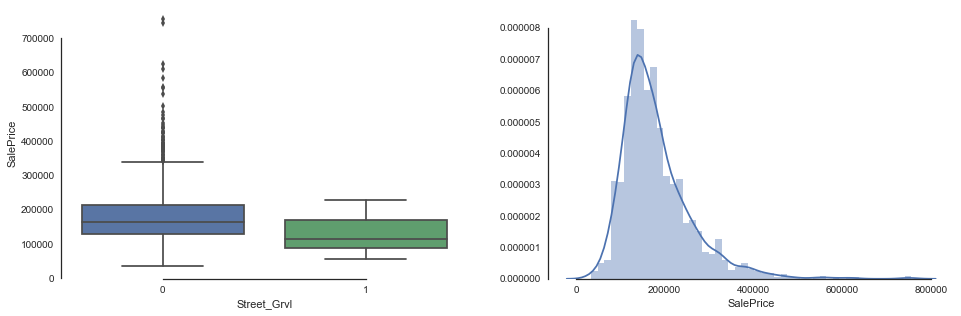

In [9]:
fig, axs = plt.subplots(ncols=2, figsize=(16,5))
sns.set_style("white")
sns.boxplot("Street_Grvl","SalePrice",data=subsetHomePrice, ax = axs[0])
sns.distplot(subsetHomePrice["SalePrice"], ax = axs[1])

sns.despine(trim=True)

The amount of above-grade living area is also skewed to the right. 

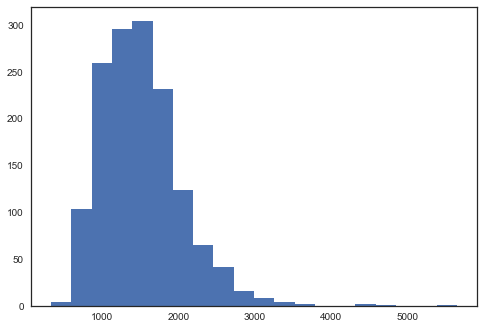

In [10]:
plt.hist(subsetHomePrice["GrLivArea"], bins=20)
plt.show()

### Next, based on what you learned via your data exploration, create ten new features. Explain the reasoning behind each one.

In an initial step, I will create a populate the homePrices dataset with dummy variables for later variable filtering. As each new feature is created, it will be added to the bigHomePrice dataset as well. 


In [11]:
bigHomePrice = pd.get_dummies(homePrices)
big_vars_of_interest = bigHomePrice.columns


### New Features: 

The sq footage of each home only includes above-grade sqft. Let's include the basement square footage to get a better idea of the sqft of the entire home. 

*Total_sqft = GrLivArea + Bsmt*







In [12]:
bigHomePrice["Total_sqft"] = homePrices["GrLivArea"] + homePrices["TotalBsmtSF"]
homePrices["Total_sqft"] = homePrices["GrLivArea"] + homePrices["TotalBsmtSF"]

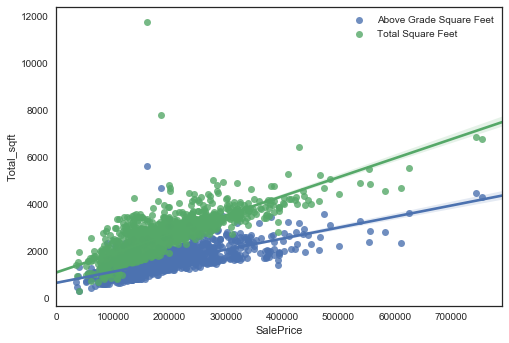

In [13]:
#fig, axs = plt.subplots(ncols=1, figsize=(16,5))
sns.regplot(x = "SalePrice", y = "GrLivArea", data = subsetHomePrice, label="Above Grade Square Feet")
sns.regplot(x = "SalePrice", y = "Total_sqft", data = bigHomePrice, label= "Total Square Feet")
plt.legend()

If the basement is not finished, it may not contribute to the living area of the home. The bsmt sqft is added only if the basement is finished. 
*Total_finished_Sqft = GrLivArea + bsmt(if bsmt has living quarters)*


In [14]:
#if homePrices[homePrices["BsmtFinType1"] (== re.match('LQ')):
#   homePrices["Total_finished_Sqft"] = homePrices["GrLivArea"] + homePrices["TotalBsmtSF"]
#else:
#   homePrices["Total_finished_Sqft"] = homePrices["GrLivArea"]           


Let's get a picture of the total number of full and half baths in the home.
*totalFullBath = bsmtFullBath + fullBath *
*totalHalfBath = bsmtHalfBath + halfBath *





In [15]:
bigHomePrice["totalFullBath"] = homePrices["BsmtFullBath"] + homePrices["FullBath"] 
bigHomePrice["totalHalfBath"] = homePrices["BsmtHalfBath"] + homePrices["HalfBath"]


The deck sqft is broken up into several variables based on the type of porch. Let's introduce a variable including only deck sqft. 
*deck_sqft = woodDeckSF + openPorchSF + enclosedPorch + 3SsnPorch + screen porch) *

In [16]:
bigHomePrice["deck_sqft"] = (homePrices["WoodDeckSF"] + homePrices["OpenPorchSF"] + 
                           homePrices["EnclosedPorch"] + homePrices["3SsnPorch"] + 
                           homePrices["ScreenPorch"])

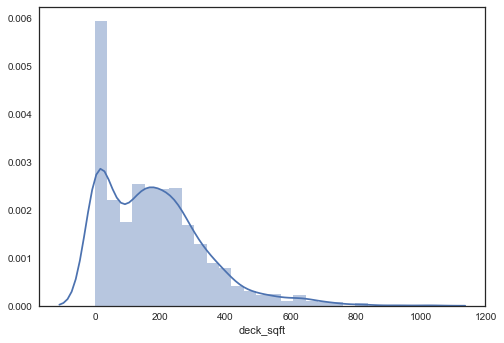

In [17]:
sns.distplot(bigHomePrice["deck_sqft"])

The Sale Prices variable not not follow a normalized distribution. Let's see if logging the price might fix this. Let's also try creating a feature of the square root of the sale price, as well as the inverse of the sale price. 
*loggedSalePrice = log(SalePrice)*

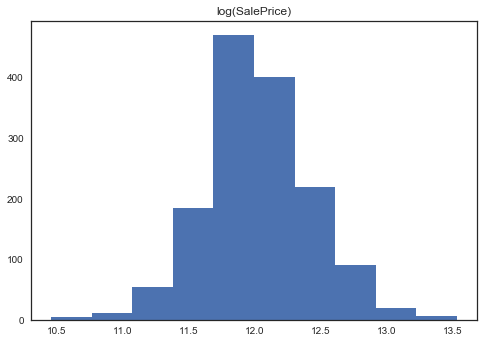

In [18]:
newSalePriceVar = subsetHomePrice["SalePrice"]
loggedSalePrice = np.log(newSalePriceVar)
bigHomePrice["loggedSalePrice"]= np.log(bigHomePrice["SalePrice"])
plt.hist(loggedSalePrice)
plt.title("log(SalePrice)")

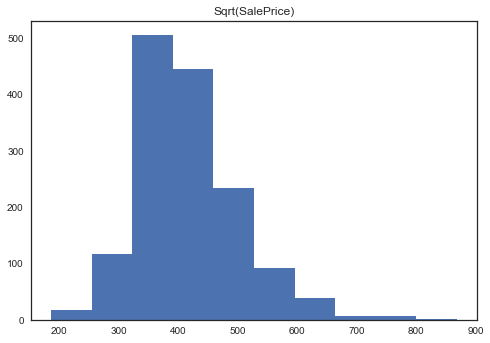

In [19]:
sqrtSalePrice = np.sqrt(newSalePriceVar)
bigHomePrice["sqrtSalePrice"] = np.sqrt(bigHomePrice["SalePrice"])
plt.hist(sqrtSalePrice)
plt.title("Sqrt(SalePrice)")


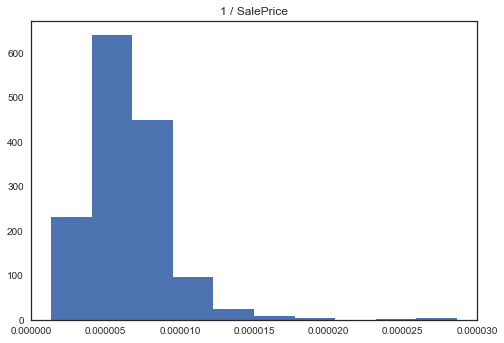

In [20]:
oneOverSalePrice = 1 / newSalePriceVar
bigHomePrice["oneOverSalePrice"] = 1/bigHomePrice["SalePrice"]
plt.hist(oneOverSalePrice)
plt.title("1 / SalePrice")

Of the three variants on SalePrice, the logged sale price variable achieves the most normal distribution. 


Perhaps people prefer lots with a certain proportion of homesq/acreage. Let's see if we can create this feature. 






In [21]:
bigHomePrice['ratioHomeAcre'] = homePrices['GrLivArea'] / homePrices['LotArea']

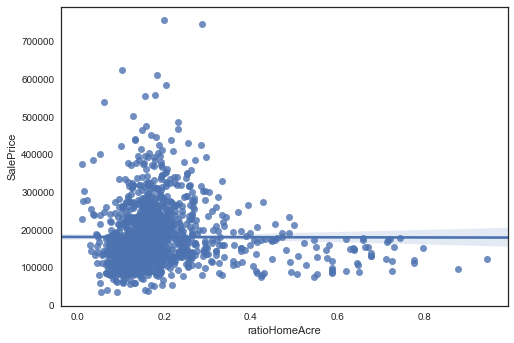

In [22]:
sns.regplot(x=bigHomePrice["ratioHomeAcre"], y = bigHomePrice['SalePrice'])

The 10th created feature shall be a subset of the original dataset. We will create a dataset that only included homes that were the product of a normal sale, and excluding trades, foreclosures, short sales, partial (incomplete) home sales, sales between family members, etc. 


In [23]:
#normalHomeSales = bigHomePrice[bigHomePrice["SaleCondition"] == "Normal"]
normalHomeSales = homePrices[homePrices["SaleCondition"] == "Normal"]


In [24]:
normalHomeSales.SaleCondition.value_counts()


Normal    1198
Name: SaleCondition, dtype: int64

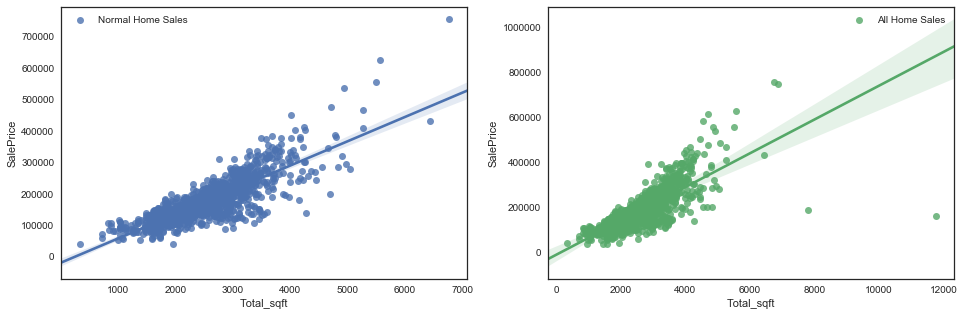

In [25]:
fig, axs = plt.subplots(ncols=2, figsize=(16,5))
sns.regplot(x=normalHomeSales['Total_sqft'], y=normalHomeSales['SalePrice'], label = "Normal Home Sales", ax = axs[0])
sns.regplot(x=homePrices["Total_sqft"], y=homePrices['SalePrice'], label = "All Home Sales", ax = axs[1])
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=0)
    plt.legend()


In [26]:
# Filter based on some threshold of correlation. 

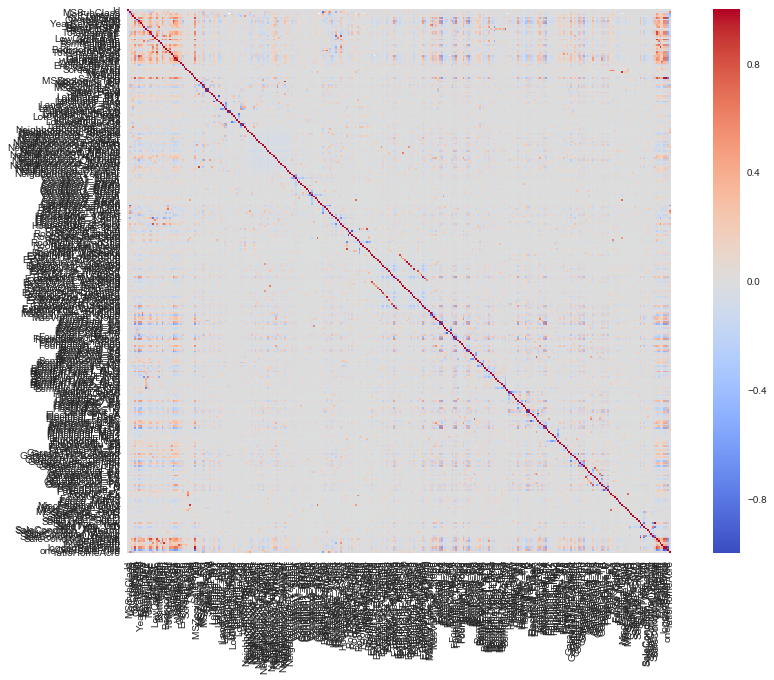

In [27]:
big_vars_of_interest = bigHomePrice.columns

# Correlation matrix of numerical features
corrmat=bigHomePrice[big_vars_of_interest].corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True, cmap='coolwarm')
plt.show()

In [28]:
big_vars_of_interest.unique()

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleCondition_Normal', 'SaleCondition_Partial', 'Total_sqft',
       'totalFullBath', 'totalHalfBath', 'deck_sqft', 'loggedSalePrice',
       'sqrtSalePrice', 'oneOverSalePrice', 'ratioHomeAcre'],
      dtype='object', length=298)

### Filtering
We now filter based on how well the variable correlates with Sale Price. 

In [29]:
best_features = corrmat[corrmat["SalePrice"] >= 0.50]
best_features = list(best_features.index)

#best_features

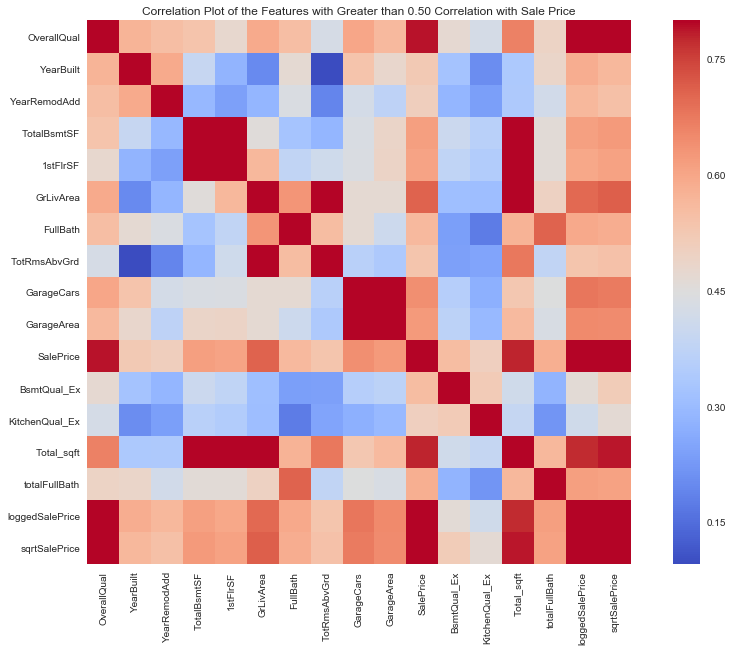

In [30]:
# Correlation matrix of numerical features
corrmat=bigHomePrice[best_features].corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True, cmap='coolwarm')
plt.title("Correlation Plot of the Features with Greater than 0.50 Correlation with Sale Price")
plt.show()
